# Análisis de Datos con Pandas

Escuela de Informática y Telecomunicaciones</br> Duoc UC Material facilitado por el Profesor ESTEBAN RUCAN

## ¿Qué es Pandas?

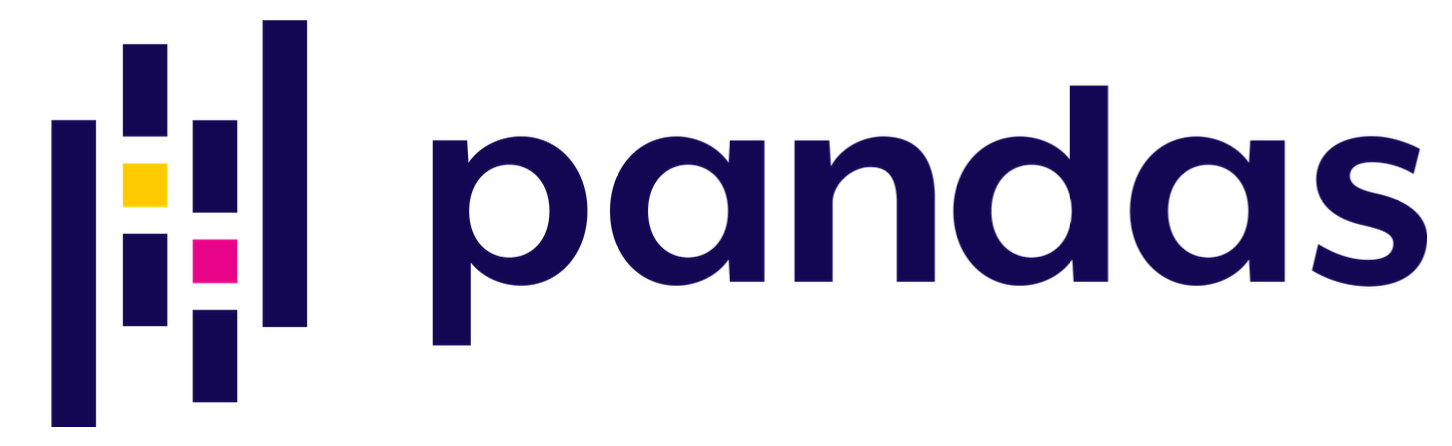


* Es una librería escrita como extensión de [NumPy](https://numpy.org/doc/) para manipulación y análisis de datos. Fue desarrollada en 2008 con el propósito de manejar series de tiempo. Su nombre se puede descomponer como Panel Data.

* Por convención se importa con el alias pd.

* Tiene soporte para cargar y guardar archivos fuera de Python.

* Tiene una performance bastante aceptable al estar desarrollada bajo Cython (Uso de Python bajo el lenguaje C).

* Rápida conexión con otras librerías como NumPy , Matplotlib , SciPy y scikit- learn.

* Soporte para transformación de datos.

* Manejo de datos faltantes.

* Documentación: https://pandas.pydata.org/docs/.

* Etc.


## Estructura DataFrame y Series

* Series : Estructura de datos unidimensional con un conjunto de datos asociados a un índice. Se puede crear directamente desde un array de Numpy o una lista.

* DataFrame : Es una extensión de las Series. Mientras que un objecto Series contiene dos componentes: un set de valores e índices asociados, el DataFrame contiene tres componentes: Eje 0 (filas), Eje 1 (columnas) e índices asociados a cada fila. Su estructura básica es el array de NumPy. Se puede crear directamente desde un diccionario.

* Para una visualización correcta de DataFrame s, cambiaremos print por display , una función que carga automáticamente Jupyter (lo que estamos usando ahora para crear nuestro código) proveniente de la librería IPython.

In [ ]:
# Ejemplo de crear Series
# Recordatorio de importar pandas
import pandas as pd
pd.options.display.float_format = '{:.6f}'.format
precios = [1000, 2000, 1500, 300, 600, 500, 5000]
precios_series = pd.Series(precios)
print("lista:", precios)
print(precios_series)

In [ ]:
# Ejemplo de crear DataFrame a partir de un diccionario.
diccionario = [
{"cancion": "La Bachata", "artista": "Manuel Turizo", "reproducciones": "269,343"}
{"cancion": "Te Felicito", "artista": "Shakira", "reproducciones": "101,857"},
{"cancion": "Shakira: Bzrp Mussic Sessions, Vol. 53", "artista": "Shakira", "repro
{"cancion": "Parcera", "artista": "Pailita", "reproducciones": "159,147"}
]
datos = pd.DataFrame(diccionario)
# cambiamos print por display
display(datos)

* Además, podemos asignar una columna como índice, cumpliendo la función de Identificador dentro del conjunto de datos.
* Esto facilita el filtro e identificación de filas.

In [ ]:
# Ejemplo de aplicar índice
datos_indice = datos.set_index("cancion")
display(datos_indice)

## Carga de datasets

* pandas puede leer datos desde una gran variedad de formatos usando sus funciones de
carga.

* Algunas de estas funciones son pd.read_csv , pd.read_table , pd.read_excel, pd.read_html y pd.read_stata.

* Podemos indicar varios parámetros como columns , parse_dates e index_col.

* En particular, el parámetro parse_dates debe recibir una lista con las variables que se desee reconocer como fechas, estás deben seguir el estándar ISO 8601. 

* Además, accedemos a las cinco primeras entradas de las bases de datos cargadas con el
método head.


Carguemos la base de datos superstore.csv , que muestra datos sobre una famosa cadena de Retail ubicada en Estados Unidos.

In [ ]:
# Ejemplo de cargar bases de datos. Con archivo "superstore.csv".
data = pd.read_csv("superstore.csv", parse_dates=["Order Date"], index_col="Order Date
display(data.head())

## Análisis Inicial de Datos

* Es necesario para obtener una perspectiva general nuestros datos.

* Obtenemos una descripción cuantitativa con el método describe().

* Visualizamos tipos de variables y datos faltantes con el método info().

* Obtenemos columnas de la base de datos con la propiedad columns.

* Las dimensiones de la base de datos las obtenemos con la propiedad shape.

In [ ]:
# Uso de describe
# 9.993e+03 = 9.993 * 10 ^ 3 = 9993
display(data.describe())

* La media puede ser un buen indicador para comprender el comportamiento de una variable numérica. Sin embargo, esta es sensible a valores extremos. Entonces ¿Qué herramientas nos ayudan a tener una noción correcta acerca de las variables numéricas?

    MEDIANA!!!! = 50%
    

* Para ello contamos con diferentes medidas que nos proporciona pandas , como la **desviación estándar** (ver imagen), **mínimo, primer cuartil, segundo cuartil** (mediana), **tercer cuartil y máximo.**



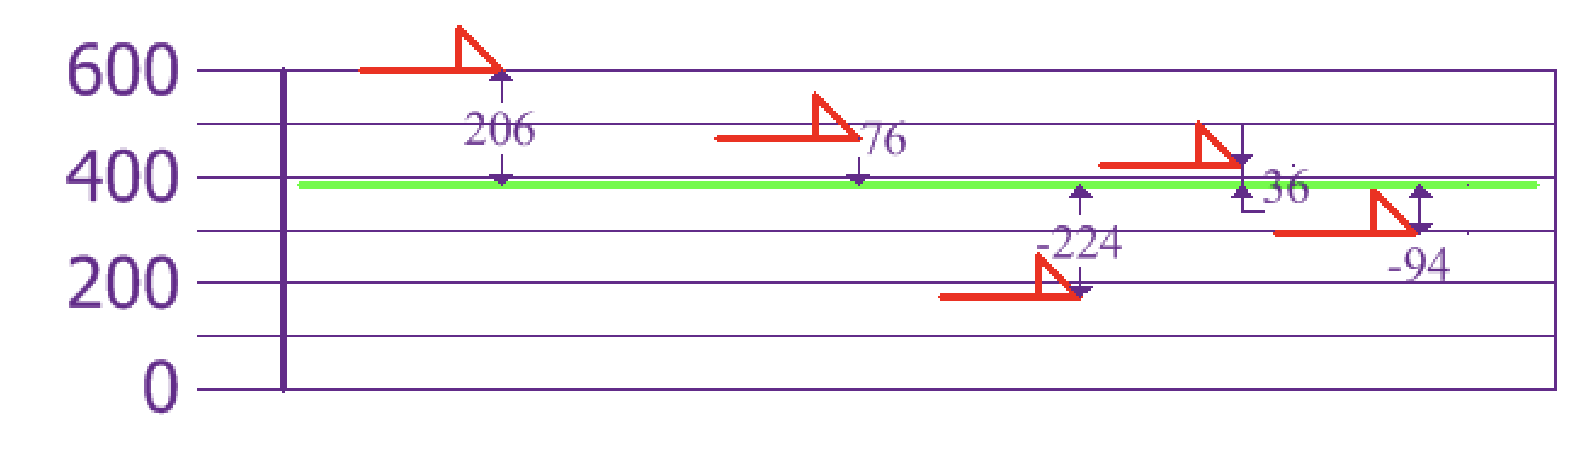

** DESVIACION ESTANDAR = promedio de esas distancias (valor observado) al promedio, en
este caso 0.206457

In [ ]:
: # Uso de info
# info no requiere de print o display
# object: string, cadena de texto o palabra
# int64: número entero
# float64: número decimal
# datetime: fecha
data.info()

In [ ]:
# Uso de columns
nombre_columnas = data.columns
print(nombre_columnas)

In [ ]:
# Uso de shape
dimensiones = data.shape
print(dimensiones)

## Subconjuntos de columnas en DataFrames

* Contamos con cuatro formas de hacerlo:

* **Incorporar subsetting directamente:** datos[listado_de_columnas].
* **De acuerdo a su localización:** datos.loc[nombre_indices, nombre_columnas].
* **De acuerdo a su índice:** datos.iloc[lista_con_indices_de_filas,
lista_con_indices_de_columnas].

* **Eliminar columnas:** datos.drop(columns=columnas_a_eliminar).

* Si seleccionamos solo una variable, obtendremos un objeto del tipo Series .

In [ ]:
# Ejemplo 1: Seleccionar la columna 'Product Name'
# string cuando es solo una variable
# para dos o más variables, debe ser una lista
product_name = data["Product Name"]
print(product_name)

In [ ]:
# Ejemplo 2: Seleccionar las columnas que comiencen con la palabra 'Order'
## Directamente
# LAMBDA : permite colocar en una sentencia una función completa...o sea, en vez de es
# def cumple_condicion
#
condicion1 = columna.startswith("Order")
#
condicion2 = columna.startswith("ORDER")
condicion3 = columna.startswith("order")
# return condicion1 or condicion2 or condicion3
#
#
cumple_condicion = lambda columna: columna.startswith("Order") or columna.startswith("
#
comienza_con_order = [columna for columna in nombre_columnas if cumple_condicion(colum
print(comienza_con_order)
data_order = data[comienza_con_order]
display(data_order.head())

In [ ]:
## Con loc
# FILAS, COLUMNAS
data_loc = data.loc[:, comienza_con_order]
display(data_loc.head())
# Ejemplo iloc: primeras 1000 obs. y columnas 3 a la 10
data_iloc = data.iloc[:1000, 2:10]

In [ ]:
## Eliminar columna
data_sin_order = data.drop(columns=comienza_con_order)
display(data_sin_order.head())

## Selección de filas en DataFrames

* Una de las utilidades de los índices, es poder seleccionar filas a través de ellos.
* Para este fin usamos las propiedades loc para índices nombrados (ver a continuación) e iloc para índices numéricos.
* **Recomendación:** El uso de loc resultará conveniente cuando se use como índice variables tipo fecha en orden temporal. Por otro lado, el uso de iloc es conveniente para seleccionar filas de acuerdo a su posición.

In [ ]:
# Ejemplo 1: Seleccionar las transacciones de los días
# MUY IMPORTANTE: usar método sort_index
data_ordenada = data.sort_index()
print("- Data ordenada:")
display(data_ordenada.head())
# 1, 2 y 3 de julio de 2017
print("\n- Selección de filas:")
display(data.loc["2017-07-01":"2017-07-03", :])

* Además, para seleccionar filas podemos usar filtros, esto es seleccionar solo las que cumplan cierta condición.
* Algunas formas son las siguientes: 
* **Escribir directamente la condición:** datos[condición] . (para consultas más complejas)
* **A través del método loc:** datos.loc[condicion, columnas]

* **Método query:** datos.query("condicion") . (para consultas más sencillas)

* **Importante:** los operadores and y or en pandas son reemplazados por & y | y las condiciones deben estar entre parentesis.

In [ ]:
# Ejemplo 1: Filtrar transacciones realizadas en el estado de New York
condicion = data["State"] == "New York"
print(condicion)
data_new_york = data[condicion]
display(data_new_york.head())

In [ ]:
# Usando método query
# Uso de comillas dobles y simples
data_new_york_query = data.query("State == 'New York'")

In [ ]:
# Ejemplo 2: Seleccionar transacciones que fueron entre navidad y año nuevo, independi
# Darse el tiempo de pensar en la condición óptima
# 1° día > 25
# 2° mes == 12
# display(data.head())
condicion1 = data["Order Day"] > 25
condicion2 = data["Order Month"] == 12
condicion = condicion1 & condicion2 # &: and
display(data[condicion])

## Creación y edición de variables

* En ciertas ocaciones, crear columnas a través de las que ya tenemos disponibles nos ayuda a comprender de mejor forma nuestro conjunto de datos.

* Aplicar nuestros conocimientos previos es de suma relevancia para crear columnas con información útil para el análisis.

* El objeto tipo `Series` se encuentra vectorizado, lo que nos evita usar `loops` u otras funciones más compejas cuando la edición o creación de variables es sencilla.

* **Ejemplos:** Transformar dólares a pesos chilenos o viceversa, crear una columna que me indique si la fecha es víspera de las fiestas de fin de año, variable que me índique si es feriado o fin de semana, o si el monto de la venta es inferior a lo esperado.

Función útil para crear categorías:

**<span style='color:green'>import</span>** numpy **<span style='color:green'>as</span>** np

datos**<span style='color:red'>["nombre_columna_nueva"]</span>** = np.where(condicion, valor_si_True,
valor_si_False)

In [ ]:
# Ejemplo 1: Convertir pesos chilenos a dólares (1 USD = 930 CLP)
# Sobre-escribimos - Recordar cambiar el nombre para que tenga sentido posteriormente
data["Profit CLP"] = data["Profit CLP"] / 930
data["Sales CLP"] = data["Sales CLP"] / 930

In [ ]:
display(data.head())

In [ ]:
# Ejemplo 2: Crear una variable que sea 'Yes' si la fecha es fin de semana, 'No' en ca
import numpy as np
data["Weekend"] = np.where(data["Order Weekday"].isin(["Saturday", "Sunday"]), "Yes",
display(data.head())

* Cuando las transformaciones necesarias son algo más complejas, es de ayuda el método `apply` , que recibe como argumento una función predefinida o anónima.

    datos[columnas] = datos[columnas].apply(funcion)

In [ ]:
# Ejemplo: Categorizar variable "Discount" de acuerdo a la siguiente función.
def descuento_cat(valor):
if valor <= 0.2:
return "0-20%"
elif valor <= 0.4:
return "20-40%"
elif valor <= 0.6:
return "40-60%"
elif valor <= 0.8:
return "60-80%"
else:
return "80-100%"
data["Discount Cat"] = data["Discount"].apply(descuento_cat)
display(data.head(20)) # Veamos 20 primeros valores

* Cambiemos los nombres de las variables "Profit CLP" y "Sales CLP" para una mayor concordancia con la transformación a dólares.

* Usamos el método `rename` , que recibe un diccionario en el parámetro `columns`.

    datos.rename(columns=diccionario)

In [ ]:
# Ejemplo de usar rename
nuevos_nombres = {
"Profit CLP": "Profit",
"Sales CLP" : "Sales"
}
# Creamos variable para conservar cambios
data = data.rename(columns=nuevos_nombres)
display(data.head())

## Resumen de variables

* Una forma de representar variables es a través de estadísticos de resumen.

* Estos incluyen medias, varianzas, percentiles, etc.

* Al igual que en NumPy, podemos acceder a distintos métodos directamente desde una variable seleccionada.

* Podemos cálcular varios resúmenes a través del método agg (aggregate), que puede recibir como argumento una lista con las estadísticas a calcular.

    datos<span style='color:red'>["columna"]</span>.estadistica()
    
    datos<span style='color:red'>["columna"]</span>.agg(<span style='color:red'>["estadística1", "estadística2", "etc"]</span>)
    
    datos.agg({<span style='color:red'>"columna1"</span>:  <span style='color:red'>["estadística1", "estadística2", "etc"]</span>, <span style='color:red'>"columna2"</span>:  <span style='color:red'>["estadística3", "estadística4", "etc"]</span>})

In [ ]:
# Ejemplo 1: Calcular media y desviación estandar de la variable profit
## FORMA 1
print("media:", data["Profit"].mean())
print("std:", data["Profit"].std())
## FORMA 2
media_y_std = data["Profit"].agg(["mean", "std", "median", "var"])
print("\nmedia y std:\n", media_y_std)

In [ ]:
# Ejemplo 2: Calcular media y mediana de las variables que incluyan divisas.
resumenes = {
"Profit": ["mean", "median"],
"Sales": ["mean", "median", "std"]
}
media_mediana = data.agg(resumenes)
print(media_mediana)

* También podemos observar estadísticas por grupo.

* Esto es ver el comportamiento de cada categoría de una variable respecto a las estadísticas indicadas.

* Para llevar esto a cabo, usamos el método `groupby` , que recibe como argumento una lista con las variables a agrupar.

* Luego de esto, podemos realizar los resúmenes de variables necesarios.

In [ ]:
# Ejemplo 1: Agrupar por variable 'Category' y calcular media de Profit
print(data.groupby(["Category"]).agg({"Profit": "mean"}))
print("")
print(data.groupby(["Category"])["Profit"].mean()) # Alternativa

In [ ]:
# Ejemplo 2: Cálcular media de Sales según Estado y Categoría
display(data.groupby(["State", "Category"]).agg({"Sales": "mean"}))

## Frecuencias dentro de variables

* Esto es útil para observar el comportamiento de las categorías pertenecientes a una variable.

* Encontramos la frecuencia absoluta y relativa.

* **Frecuencia absoluta:** Es una medida estadística que nos indica la cantidad de veces que ocurren ciertos eventos.

* **Frecuencia relativa:** Es el cuociente entre la frecuencia absoluta y la cantidad de observaciones disponibles (en el contexto de una base de datos).

* Para calcular **frecuencias absolutas**, usamos el método `value_counts` de una variable seleccionada.

* Para calcular **frecuencias relativas**, además debemos especificar el argumento `"%"` o
'"normalize=true"'

In [ ]:
# Ejemplo 1: Calcular frecuencias de la variable 'Category'.
# Frecuencia absoluta
print(data.value_counts("Category"))
print("")
print(data["Category"].value_counts())

In [ ]:
# Frecuencia relativa
print(data.value_counts("Category", "%"))
print("")
print(data["Category"].value_counts("%").apply(lambda x: str(round(x * 100, 2)) + "%")

In [ ]:
data.value_counts("Category", "%").to_frame("porcentajes")

In [ ]:
data.value_counts("Category", "%").to_frame().to_excel("porcentajes.xlsx")

## Material Complementario

* [Python for Data Analysis](https://www.oreilly.com/library/view/python-for-data/9781491957653/) por Wes McKinney.
* [Documentación oficial de Pandas](https://pandas.pydata.org/docs/)
* [Canal de YouTube de Corey Schafer - Pandas Tutorials](https://www.youtube.com/watch?v=yzIMircGU5I&list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS)
* [Canal de Youtube learndataaa - Python in Data Science for Beginners](https://www.youtube.com/playlist?list=PLXovS_5EZGh6CpyyB4m7dQDlcocsqIseK)
* [Conjuntos de datos en Kaggle](https://www.kaggle.com/datasets)
* [Cursos de Pandas en DataCamp](https://www.datacamp.com/courses/tech:pandas)
* [Cursos de Pandas en DataQuest](https://www.dataquest.io/course/pandas-fundamentals/)
* [Cursos de Pandas en EDX](https://www.edx.org/learn/pandas)
* [Meetups y conferencias de datos](https://www.meetup.com/topics/data-analytics/)